## Name : Titus Mutuku ##

## Overview

* I undertook a comprehensive data analysis project focused on building inferential classification models for the Vehicle Safety Board of Chicago based on crash data. I initiated by cleaning and formatting the data provided by the City of Chicago, which includes information on crashes, vehicles, and people involved in crashes from 2016.
* The objective of the project was to model the primary contributory causes of car accidents, classifying them into two categories. This implies a binary classification problem where my goal was to predict whether a crash is preventable or not.
* I adopted an iterative modeling approach, trying out multiple classification models to assess their performance. I explored various models for binary classification, such as Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, and Neural Networks.
* The models aimed to identify factors or features contributing to preventable crashes, providing valuable insights into the root causes of accidents and suggesting targeted interventions.
* Recommendations derived from my analysis include investing in driver education for certain age groups and addressing specific road conditions that could lead to a crash. These recommendations aim to enhance road safety and mitigate the occurrence of preventable accidents.

## Business Problem

* In this Project, the central focus revolves around addressing a critical dilemma faced by the Vehicle Safety Board of Chicago—specifically, the optimal allocation of resources between drivers' education and road infrastructure improvements to curtail the occurrence of preventable crashes. To tackle this multifaceted challenge, a comprehensive analysis is undertaken, drawing insights from historical crash data as from 2016.
* The initial steps involve meticulously collecting and cleansing data obtained from the City of Chicago records. This process ensures the integrity of the dataset, encompassing details on crashes, involved vehicles, and individuals. The dataset is delved into, conducting exploratory analyses to discern patterns related to preventable and non-preventable crashes. Additionally, feature engineering is employed to identify pertinent variables—such as weather conditions, time of day, and driver demographics—that could significantly influence the preventability of crashes.
* With a refined dataset in hand, an iterative modeling approach is adopted, experimenting with a range of classification algorithms including Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, and Neural Networks. The objective is to assess the performance of these models, employing metrics such as accuracy, precision, recall, and F1-score to gauge their effectiveness.
* Following model selection, the project proceeds with training and testing phases, fine-tuning hyperparameters, and evaluating the models' ability to generalize to new, unseen data. As interpretability is paramount, the models are enhanced to provide clear insights into the factors influencing crash preventability. Key findings are identified, shedding light on the features that contribute significantly to preventable crashes.
* Armed with these insights, evidence-based recommendations are presented to the Vehicle Safety Board. These recommendations delineate the expected impact of investing in drivers' education programs versus road infrastructure improvements in mitigating the occurrence of preventable crashes. The validation phase ensures the robustness of the models, with iterative adjustments made based on stakeholder feedback and additional data.
* In the final stage, the findings, insights, and recommendations are communicated to the Vehicle Safety Board in a comprehensible and actionable manner. The ultimate goal of this project is to empower the board with informed decision-making tools, facilitating the reduction of preventable crashes in Chicago through strategic resource allocation.

## Data Understanding

* Collaborating with the Vehicle Safety Board of Chicago, the objective is to facilitate the launch of a new campaign dedicated to reducing car crashes. The primary assignment involves constructing an inferential model capable of distinguishing between preventable and less preventable crashes. In this context, "Preventable" incidents are defined as those easily avoidable, typically arising from factors such as non-compliance with traffic laws and negligent driving. On the other hand, "Less Preventable" crashes involve incidents that demand a substantial investment of resources, including money, time, and labor, to address issues such as adverse road conditions, impaired visibility, and inclement weather.
* The modeling strategy entails leveraging historical crash data to identify patterns and crucial features associated with each classification. The aim is to furnish the Vehicle Safety Board with an inferential tool capable of not only categorizing crashes but also offering insights into the contributing factors for each classification.
* Through this endeavor, the intention is to provide the Vehicle Safety Board with a data-driven foundation to inform their campaign strategies effectively. By discerning the preventability of crashes, the Board can implement targeted interventions—whether focusing on enhancing driver education to address preventable factors or addressing infrastructure challenges for less preventable incidents. The overarching goal is to contribute to the success of the campaign and, ultimately, to enhance overall vehicle safety in Chicago.


**Importing Necessary Packages**

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the Data

In [171]:
#Import all the three databases 
crashes = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
vehicles = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
people =pd.read_csv('Traffic_Crashes_-_People.csv')

In [180]:
#Reading the Crashes database
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [177]:
#Reading the People database
people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [181]:
#Reading the Vehicles dataset
vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1554880,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,04/14/2023 02:05:00 PM,1.0,DRIVER,NaN,1478881.0,NaN,FORD,TRANSIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,1.0,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,2.0,PARKED,NaN,834819.0,NaN,TOYOTA,YARIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,3.0,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),SIERRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1554881,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,04/14/2023 02:05:00 PM,2.0,DRIVER,1.0,1478892.0,NaN,ISUZU,TRUCK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# Merging crashes with vehicles
merged = pd.merge(left=crashes, right=vehicles, on='CRASH_RECORD_ID')

In [184]:
merged.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
merged.shape

(1000948, 118)

In [186]:
# Assuming 'CRASH_RECORD_ID' is the key for merging, merge the three main datasets
df= pd.merge(left=merged, right=people, on='CRASH_RECORD_ID', how='left')


In [187]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Check the Shape of the Merged dataset
print(df.shape)


(1633868, 146)


In [188]:
#Check the information of the merged dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633868 entries, 0 to 1633867
Columns: 146 entries, CRASH_RECORD_ID to CELL_PHONE_USE
dtypes: float64(26), int64(6), object(114)
memory usage: 1.8+ GB


In [18]:
# Check for null values in the entire DataFrame
print(df.isnull().sum())

CRASH_RECORD_ID                 0
CRASH_DATE_EST_I          1526892
CRASH_DATE_x                    0
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
                           ...   
PEDPEDAL_VISIBILITY       1599138
PEDPEDAL_LOCATION         1599054
BAC_RESULT                 508065
BAC_RESULT VALUE          1632154
CELL_PHONE_USE            1631600
Length: 146, dtype: int64


In [190]:
#check for the description of all the details in the dataframe
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,...,CMV_ID,HAZMAT_REPORT_NO,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_ID_y,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.633868e+06,7.648520e+05,1.633868e+06,1.633852e+06,1.633868e+06,1.632208e+06,1.632208e+06,1.632208e+06,1.632208e+06,1.632208e+06,...,16431.000000,0.0,2591.000000,78.000000,3283.000000,4643.000000,1.288883e+06,199472.000000,936650.000000,1714.000000
mean,2.865919e+01,1.076851e+01,3.587781e+03,1.239926e+03,2.163740e+00,2.517590e-01,1.509612e-03,2.791433e-02,1.399429e-01,8.239207e-02,...,6033.581949,NaN,46.089155,44.538462,51.303076,9.261253,4.244678e+05,4.237823,38.402913,0.169673
std,6.152349e+00,2.327157e+03,2.853138e+03,7.080687e+02,6.011661e-01,7.398745e-01,4.421064e-02,2.117228e-01,5.464239e-01,4.078942e-01,...,4545.072133,NaN,18.023048,27.216158,34.910390,381.659002,2.823102e+05,2.230723,16.890705,0.098040
min,0.000000e+00,0.000000e+00,0.000000e+00,1.110000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,NaN,1.000000,2.000000,1.000000,1.000000,2.000000e+00,1.000000,-177.000000,0.000000
25%,3.000000e+01,2.000000e+00,1.200000e+03,7.130000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2738.000000,NaN,40.000000,25.500000,30.000000,2.000000,2.133365e+05,3.000000,26.000000,0.120000
50%,3.000000e+01,2.000000e+00,3.115000e+03,1.213000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5066.000000,NaN,53.000000,46.500000,53.000000,3.000000,3.980180e+05,3.000000,36.000000,0.170000
75%,3.000000e+01,4.000000e+00,5.501000e+03,1.822000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,7943.500000,NaN,53.000000,53.000000,65.000000,5.000000,5.520880e+05,6.000000,50.000000,0.210000
max,9.900000e+01,1.191625e+06,4.511000e+05,6.100000e+03,1.800000e+01,2.100000e+01,4.000000e+00,1.000000e+01,2.100000e+01,1.500000e+01,...,18278.000000,NaN,200.000000,120.000000,999.000000,26009.000000,1.595032e+06,12.000000,110.000000,0.990000


In [191]:
# calculating nulls
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
CRASH_DATE_EST_I,0.934526
LANE_CNT,0.531877
REPORT_TYPE,0.037044
INTERSECTION_RELATED_I,0.747987
NOT_RIGHT_OF_WAY_I,0.965541
HIT_AND_RUN_I,0.716800
STREET_DIRECTION,0.000006
STREET_NAME,0.000001
BEAT_OF_OCCURRENCE,0.000010
PHOTOS_TAKEN_I,0.986739


In [192]:
# extracting columns with excesssive nulls which is set at 95%
Index_label = null_percent[null_percent>.70].index.tolist()
Index_label

['CRASH_DATE_EST_I',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I',
 'NUM_PASSENGERS',
 'CMRC_VEH_I',
 'TOWED_I',
 'FIRE_I',
 'EXCEED_SPEED_LIMIT_I',
 'TOWED_BY',
 'TOWED_TO',
 'AREA_00_I',
 'AREA_01_I',
 'AREA_02_I',
 'AREA_03_I',
 'AREA_04_I',
 'AREA_05_I',
 'AREA_06_I',
 'AREA_07_I',
 'AREA_08_I',
 'AREA_09_I',
 'AREA_10_I',
 'AREA_11_I',
 'AREA_12_I',
 'AREA_99_I',
 'CMV_ID',
 'USDOT_NO',
 'CCMC_NO',
 'ILCC_NO',
 'COMMERCIAL_SRC',
 'GVWR',
 'CARRIER_NAME',
 'CARRIER_STATE',
 'CARRIER_CITY',
 'HAZMAT_PLACARDS_I',
 'HAZMAT_NAME',
 'UN_NO',
 'HAZMAT_PRESENT_I',
 'HAZMAT_REPORT_I',
 'HAZMAT_REPORT_NO',
 'MCS_REPORT_I',
 'MCS_REPORT_NO',
 'HAZMAT_VIO_CAUSE_CRASH_I',
 'MCS_VIO_CAUSE_CRASH_I',
 'IDOT_PERMIT_NO',
 'WIDE_LOAD_I',
 'TRAILER1_WIDTH',
 'TRAILER2_WIDTH',
 'TRAILER1_LENGTH',
 'TRAILER2_LENGTH',
 'TOTAL_VEHICLE_LENGTH',
 'AXLE_CNT',
 'VEHICLE_CONFI

In [194]:
# previewing shape, data and info 
df = df.drop(columns = Index_label)
print(df.shape)
display(df.head())
df.info()

KeyError: "['CRASH_DATE_EST_I' 'INTERSECTION_RELATED_I' 'NOT_RIGHT_OF_WAY_I'\n 'HIT_AND_RUN_I' 'PHOTOS_TAKEN_I' 'STATEMENTS_TAKEN_I' 'DOORING_I'\n 'WORK_ZONE_I' 'WORK_ZONE_TYPE' 'WORKERS_PRESENT_I' 'NUM_PASSENGERS'\n 'CMRC_VEH_I' 'TOWED_I' 'FIRE_I' 'EXCEED_SPEED_LIMIT_I' 'TOWED_BY'\n 'TOWED_TO' 'AREA_00_I' 'AREA_01_I' 'AREA_02_I' 'AREA_03_I' 'AREA_04_I'\n 'AREA_05_I' 'AREA_06_I' 'AREA_07_I' 'AREA_08_I' 'AREA_09_I' 'AREA_10_I'\n 'AREA_11_I' 'AREA_12_I' 'AREA_99_I' 'CMV_ID' 'USDOT_NO' 'CCMC_NO'\n 'ILCC_NO' 'COMMERCIAL_SRC' 'GVWR' 'CARRIER_NAME' 'CARRIER_STATE'\n 'CARRIER_CITY' 'HAZMAT_PLACARDS_I' 'HAZMAT_NAME' 'UN_NO'\n 'HAZMAT_PRESENT_I' 'HAZMAT_REPORT_I' 'HAZMAT_REPORT_NO' 'MCS_REPORT_I'\n 'MCS_REPORT_NO' 'HAZMAT_VIO_CAUSE_CRASH_I' 'MCS_VIO_CAUSE_CRASH_I'\n 'IDOT_PERMIT_NO' 'WIDE_LOAD_I' 'TRAILER1_WIDTH' 'TRAILER2_WIDTH'\n 'TRAILER1_LENGTH' 'TRAILER2_LENGTH' 'TOTAL_VEHICLE_LENGTH' 'AXLE_CNT'\n 'VEHICLE_CONFIG' 'CARGO_BODY_TYPE' 'LOAD_TYPE' 'HAZMAT_OUT_OF_SERVICE_I'\n 'MCS_OUT_OF_SERVICE_I' 'HAZMAT_CLASS' 'SEAT_NO' 'HOSPITAL' 'EMS_AGENCY'\n 'EMS_RUN_NO' 'PEDPEDAL_ACTION' 'PEDPEDAL_VISIBILITY' 'PEDPEDAL_LOCATION'\n 'BAC_RESULT VALUE' 'CELL_PHONE_USE'] not found in axis"

In [ ]:
# dropping following columns due to irrelevance in predicting the cause of car accidents 
# irrelevent columns were dropped due to column description
drop = ['REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'INJURIES_FATAL', 
        'INJURIES_INCAPACITATING', 'MOST_SEVERE_INJURY','INJURIES_NON_INCAPACITATING',
        'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_DATE',
        'CRASH_DATE', 'EJECTION','INJURY_CLASSIFICATION']

In [ ]:
df = df.drop(columns = drop)
df.head()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633868 entries, 0 to 1633867
Data columns (total 59 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CRASH_RECORD_ID          1633868 non-null  object 
 1   CRASH_DATE_x             1633868 non-null  object 
 2   POSTED_SPEED_LIMIT       1633868 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE   1633868 non-null  object 
 4   DEVICE_CONDITION         1633868 non-null  object 
 5   WEATHER_CONDITION        1633868 non-null  object 
 6   LIGHTING_CONDITION       1633868 non-null  object 
 7   FIRST_CRASH_TYPE         1633868 non-null  object 
 8   TRAFFICWAY_TYPE          1633868 non-null  object 
 9   LANE_CNT                 764852 non-null   float64
 10  ALIGNMENT                1633868 non-null  object 
 11  ROADWAY_SURFACE_COND     1633868 non-null  object 
 12  ROAD_DEFECT              1633868 non-null  object 
 13  PRIM_CONTRIBUTORY_CAUSE  1633868 non-null 

In [206]:
#There are some Redundant Columns
# dropping redundant columns, previewing shape, data and info 
drop = [ 'ALIGNMENT', 'SEC_CONTRIBUTORY_CAUSE',
        'NUM_UNITS','CRASH_UNIT_ID', 'PERSON_ID','STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'LOCATION', 'ZIPCODE', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'UNIT_NO',
       'MODEL', 'VEHICLE_YEAR', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'FIRST_CONTACT_POINT',
       'LIC_PLATE_STATE', 'CITY','CRASH_RECORD_ID']

In [208]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
print(df.shape)
print(df.info())

(1633868, 50)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633868 entries, 0 to 1633867
Data columns (total 50 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_RECORD_ID                1633868 non-null  object 
 1   CRASH_DATE_x                   1633868 non-null  object 
 2   POSTED_SPEED_LIMIT             1633868 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         1633868 non-null  object 
 4   DEVICE_CONDITION               1633868 non-null  object 
 5   WEATHER_CONDITION              1633868 non-null  object 
 6   LIGHTING_CONDITION             1633868 non-null  object 
 7   FIRST_CRASH_TYPE               1633868 non-null  object 
 8   TRAFFICWAY_TYPE                1633868 non-null  object 
 9   LANE_CNT                       764852 non-null   float64
 10  ROADWAY_SURFACE_COND           1633868 non-null  object 
 11  ROAD_DEFECT                    1633868 non-null  object 
 12  

In [211]:
# Inspecting Values per Column
for col in df.columns:
    try:
        print(col, df[col].value_counts(dropna=False)[:10])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

CRASH_RECORD_ID 023f7de8d0f7e90dc072b7b88b62502f306469597481dabc2469aecc67a1026d485ba885476a3ea258a0df3cf6543b77b69cdbfabca44ab64b0fc64c00c808ef    192
7263be3b2bded65fb935c46628eb951fa2be8fa27fc6aa27d008ba17e99bc205e6a3023616216397f886f673d149e2462bc86844ab7ec61b1550cb8fd0b72bdd    120
2e4d457f1c17474fc22def50079c66ff41d68afe9d8fe1e54d327a7a42ec16d01f68dcd21becac6fa0a11e071cdd11cfb0d1608343c6f733c73ef27fdb57eaf6    112
74e9d893f1df817db0fd24a7d10006941f1eda0c9e7a33c62bb2850e5a9560099b88bececab94471325d467f79f04ddf70ad92357f500c1e5765905d95278524    110
7be311dead41c5337cbd12d40bb7be93c505303d6f1cf92e72a2b7c695ae95b472a66d9b3a6b505a0e4c2279d53acf3b6115320fcafb54d8ee1aa3d0c811e3a0    100
13026c7fb51566d9ca487a093e38c6f5621c2ec25be48c306b6574983b61daeee589524b96bb2bfe66ddd0f695c8d2bf3ab0297558528e9c7a70363c763d6bd1     98
705a4675b8f492c49c205735ac7e7f39289a0483fecebba089e2f9bcc1b72b7f8cb39f705d1e02ff8e7b960121c4e847a3f8656f8808b4747d1474fc15b976b5     96
9b84c3f2f5fa0e45d8da97dfa252fe3a

INJURIES_UNKNOWN 0.0    1632208
Name: INJURIES_UNKNOWN, dtype: int64


CRASH_HOUR 16    130623
15    130240
17    129243
14    112157
18    105826
13     99329
12     93636
8      91429
11     79928
19     75162
Name: CRASH_HOUR, dtype: int64


CRASH_DAY_OF_WEEK 6    265352
7    242812
3    235865
5    233965
4    232416
2    226412
1    197046
Name: CRASH_DAY_OF_WEEK, dtype: int64


CRASH_DATE_y 08/17/2019 10:24:00 PM    120
10/30/2019 04:56:00 PM    112
06/09/2020 05:30:00 AM    111
11/10/2017 10:30:00 AM    110
06/22/2019 06:15:00 PM    103
11/23/2017 04:14:00 PM    100
07/28/2019 05:15:00 AM     99
10/05/2019 10:00:00 AM     98
09/26/2018 07:30:00 AM     96
10/05/2019 10:08:00 PM     96
Name: CRASH_DATE_y, dtype: int64


UNIT_TYPE DRIVER                 1435990
PARKED                  131312
PEDESTRIAN               32700
BICYCLE                  18586
DRIVERLESS                9388
NaN                       2931
NON-MOTOR VEHICLE         2323
NON-CONTACT VEHICLE        540
DISABLE

In [214]:
# prim_contributory_cause - officer's judgement
# make - irrelevant 
# vehicle_defect - most values are none/unknown
# person_type - redundant 
# state - irrelevant 
# driver_action - irrelevant 
# physical_condition - irrelevant 
# pedpedal_action - irrelevant
# pedpedal_location - irrelevant 
# bac_result - most tests not administered 

drop = ['PRIM_CONTRIBUTORY_CAUSE', 'VEHICLE_DEFECT', 'MAKE', 'PERSON_TYPE', 'STATE', 'DRIVER_ACTION',
       'PHYSICAL_CONDITION','BAC_RESULT']
df = df.drop(columns=drop)

In [212]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633868 entries, 0 to 1633867
Data columns (total 42 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_RECORD_ID                1633868 non-null  object 
 1   CRASH_DATE_x                   1633868 non-null  object 
 2   POSTED_SPEED_LIMIT             1633868 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         1633868 non-null  object 
 4   DEVICE_CONDITION               1633868 non-null  object 
 5   WEATHER_CONDITION              1633868 non-null  object 
 6   LIGHTING_CONDITION             1633868 non-null  object 
 7   FIRST_CRASH_TYPE               1633868 non-null  object 
 8   TRAFFICWAY_TYPE                1633868 non-null  object 
 9   LANE_CNT                       764852 non-null   float64
 10  ROADWAY_SURFACE_COND           1633868 non-null  object 
 11  ROAD_DEFECT                    1633868 non-null  object 
 12  REPORT_TYPE   

**Simplification of the categorical Columns**

**Begin with Creating time-bins for crash_hour**

In [216]:
# observing values of crash_hour
df.CRASH_HOUR.value_counts()

16    130623
15    130240
17    129243
14    112157
18    105826
13     99329
12     93636
8      91429
11     79928
19     75162
9      74965
7      74682
10     71873
20     57655
21     52078
22     48831
23     39280
6      35025
0      30196
1      25906
2      22104
5      20223
3      17726
4      15751
Name: CRASH_HOUR, dtype: int64

In [217]:
# creating bins for times 
# 0-6 = Late Night/Early Morning 
# 6-12 = Morning 
# 12-18 = Afternoon/Rush Hour
# 18-23 = Late Evening 
df['time_bins'] = pd.cut(x=df['CRASH_HOUR'], bins = [0,6,12,18,23], 
                         labels = ['Late Night/Early Morning', 
                        'Morning', 'Afternoon/Rush Hour','Late Evening'])
df.head()

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_VISION,time_bins
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late Evening
1,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late Evening
2,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour
3,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour
4,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour


**Creating age-bins for age**

In [218]:
df.AGE.value_counts()

 25.0     27202
 27.0     27042
 26.0     26755
 24.0     26163
 28.0     25899
          ...  
 108.0        7
 101.0        7
 103.0        4
-177.0        4
-47.0         4
Name: AGE, Length: 112, dtype: int64

In [219]:
# creating bins and labels, preview data
df['age_bins'] = pd.cut(x=df['AGE'], bins = [0,15,24,35,55,100], 
                         labels = ['15 & Under', '16-24', 
                        '25-35', '36-55','56+'])
df.head()

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_VISION,time_bins,age_bins
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late Evening,NaN
1,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late Evening,NaN
2,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour,NaN
3,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour,NaN
4,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour,NaN


**Creating posted_speed_limit bins**

In [220]:
df.POSTED_SPEED_LIMIT.value_counts()

30    1231366
35     116896
25      93594
20      56681
15      45381
10      26717
0       21815
40      16966
45      11003
5        9985
55       1471
50        410
3         393
9         319
99        230
39        152
60        100
1          85
2          63
32         45
65         27
24         24
33         22
34         18
6          18
14         12
26         12
70          9
11          8
36          6
7           6
63          4
18          4
38          4
4           4
22          4
29          4
23          4
12          3
31          2
16          1
Name: POSTED_SPEED_LIMIT, dtype: int64

In [221]:
# creating bins and label, previewing data 
df['posted_speed'] = pd.cut(x=df['POSTED_SPEED_LIMIT'], bins = [0,15,25,40,75], 
                         labels = ['0-15', '16-25', 
                        '26-40', '41+'])
df.head()

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_VISION,time_bins,age_bins,posted_speed
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late Evening,NaN,26-40
1,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late Evening,NaN,26-40
2,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour,NaN,41+
3,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour,NaN,41+
4,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour,NaN,26-40


**Cleaning traffic_control_device**

In [222]:
#Cleaning traffic_control_device
df.TRAFFIC_CONTROL_DEVICE.value_counts()


NO CONTROLS                 869305
TRAFFIC SIGNAL              507498
STOP SIGN/FLASHER           174291
UNKNOWN                      58134
OTHER                         9697
LANE USE MARKING              5083
YIELD                         2566
OTHER REG. SIGN               1505
OTHER WARNING SIGN            1192
RAILROAD CROSSING GATE        1139
SCHOOL ZONE                    690
PEDESTRIAN CROSSING SIGN       690
POLICE/FLAGMAN                 643
DELINEATORS                    436
OTHER RAILROAD CROSSING        353
FLASHING CONTROL SIGNAL        329
RR CROSSING SIGN               162
NO PASSING                     105
BICYCLE CROSSING SIGN           50
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [223]:
# defining dictionary map and remapping 
traffic_control_map = {'NO CONTROLS': 'NO CONTROLS',
                      'TRAFFIC SIGNAL': 'TRAFFIC SIGNAL/SIGN',
                      'STOP SIGN/FLASHER': 'TRAFFIC SIGNAL/SIGN',
                      'UNKNOWN': 'UNKNOWN/OTHER',
                      'OTHER': 'UNKNOWN/OTHER',
                      'YIELD': 'UNKNOWN/OTHER',
                      'SCHOOL ZONE' : 'UNKNOWN/OTHER'}

df.TRAFFIC_CONTROL_DEVICE = df.TRAFFIC_CONTROL_DEVICE.map(traffic_control_map)
df.TRAFFIC_CONTROL_DEVICE.value_counts()

NO CONTROLS            869305
TRAFFIC SIGNAL/SIGN    681789
UNKNOWN/OTHER           71087
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

**Cleaning device_condition**

In [224]:
df.DEVICE_CONDITION.value_counts()

NO CONTROLS                 881440
FUNCTIONING PROPERLY        625352
UNKNOWN                      98783
OTHER                        12365
FUNCTIONING IMPROPERLY        9729
NOT FUNCTIONING               5299
WORN REFLECTIVE MATERIAL       687
MISSING                        213
Name: DEVICE_CONDITION, dtype: int64

In [225]:
# defining dictionary map and remapping
device_map = {'NO CONTROLS': 'NO CONTROLS',
                      'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
                      'UNKNOWN': 'NOT FUNCTIONING/UNKNOWN',
                      'OTHER': 'NOT FUNCTIONING/UNKNOWN',
                      'FUNCTIONING IMPROPERLY': 'NOT FUNCTIONING/UNKNOWN',
                      'NOT FUNCTIONING ': 'NOT FUNCTIONING/UNKNOWN'}

df.DEVICE_CONDITION = df.DEVICE_CONDITION.map(device_map)
df.DEVICE_CONDITION.value_counts()

NO CONTROLS                881440
FUNCTIONING PROPERLY       625352
NOT FUNCTIONING/UNKNOWN    120877
Name: DEVICE_CONDITION, dtype: int64

**Cleaning weather_condition**

In [226]:
df.WEATHER_CONDITION.value_counts()

CLEAR                       1294093
RAIN                         151626
UNKNOWN                       69887
SNOW                          55666
CLOUDY/OVERCAST               50522
OTHER                          5175
FOG/SMOKE/HAZE                 2857
SLEET/HAIL                     2429
FREEZING RAIN/DRIZZLE          1073
SEVERE CROSS WIND GATE          321
BLOWING SNOW                    215
BLOWING SAND, SOIL, DIRT          4
Name: WEATHER_CONDITION, dtype: int64

In [227]:
#defining dictionary map and remapping
weather_map = {'CLEAR': 'CLEAR',
                'RAIN': 'RAIN/CLOUDY/OTHER',
                'CLOUDY/OVERCAST': 'RAIN/CLOUDY/OTHER',
                'UNKNOWN': 'RAIN/CLOUDY/OTHER',
                'OTHER ': 'RAIN/CLOUDY/OTHER'}

df.WEATHER_CONDITION = df.WEATHER_CONDITION.map(weather_map)
df.WEATHER_CONDITION.value_counts()

CLEAR                1294093
RAIN/CLOUDY/OTHER     272035
Name: WEATHER_CONDITION, dtype: int64

**Cleaning first_crash_type**

In [228]:
df.FIRST_CRASH_TYPE.value_counts()

REAR END                        442304
SIDESWIPE SAME DIRECTION        295261
PARKED MOTOR VEHICLE            267797
TURNING                         254292
ANGLE                           197286
PEDESTRIAN                       51571
PEDALCYCLIST                     31280
SIDESWIPE OPPOSITE DIRECTION     27632
FIXED OBJECT                     27195
HEAD ON                          16241
OTHER OBJECT                      6864
REAR TO FRONT                     6483
REAR TO SIDE                      4864
OTHER NONCOLLISION                2348
REAR TO REAR                      1408
ANIMAL                             521
OVERTURNED                         437
TRAIN                               84
Name: FIRST_CRASH_TYPE, dtype: int64

In [229]:
# defining dictionary map and remapping
crash_map = {'PEDESTRIAN': 'PED/CYCLIST',
                'PEDALCYCLIST': 'PED/CYCLIST',
                'REAR END': 'REAR END',
                'SIDESWIPE SAME DIRECTION': 'SIDESWIPE',
                'TURNING': 'TURNING/ANGLE',
                'ANGLE': 'TURNING/ANGLE',
                'PARKED MOTOR VEHICLE': 'PARKED/FIXED',
                'FIXED OBJECT': 'PARKED/FIXED',
                'REAR TO SIDE': 'OTHER',
                'SIDESWIPE OPPOSITE DIRECTION ': 'SIDESWIPE',
                'HEAD ON': 'OTHER',
                'OTHER OBJECT': 'OTHER',
                'REAR TO REAR': 'OTHER',
                'OTHER NONCOLLISION': 'OTHER'}

df.FIRST_CRASH_TYPE = df.FIRST_CRASH_TYPE.map(crash_map)
df.FIRST_CRASH_TYPE.value_counts()

TURNING/ANGLE    451578
REAR END         442304
SIDESWIPE        295261
PARKED/FIXED     294992
PED/CYCLIST       82851
OTHER             31725
Name: FIRST_CRASH_TYPE, dtype: int64

**Cleaning Trafficway Type**


In [230]:
df.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED                        749671
DIVIDED - W/MEDIAN (NOT RAISED)    309689
ONE-WAY                            196614
DIVIDED - W/MEDIAN BARRIER         104768
PARKING LOT                         94156
FOUR WAY                            51052
OTHER                               46599
ALLEY                               19604
UNKNOWN                             18828
CENTER TURN LANE                    16312
T-INTERSECTION                      10234
RAMP                                 4985
DRIVEWAY                             4322
UNKNOWN INTERSECTION TYPE            2745
Y-INTERSECTION                       1211
FIVE POINT, OR MORE                  1172
TRAFFIC ROUTE                         989
NOT REPORTED                          543
ROUNDABOUT                            232
L-INTERSECTION                        142
Name: TRAFFICWAY_TYPE, dtype: int64

In [231]:
# defining dictionary map and remapping
traffic_map = {'NOT DIVIDED': 'NOT DIVIDED',
                'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                'ONE-WAY': 'ONE-WAY',
                'FOUR WAY': 'FOUR WAY',
                'PARKING LOT': 'PARKING LOT',
                'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                'ALLEY': 'ALLEY/OTHER',
                'OTHER': 'ALLEY/OTHER',
                'CENTER TURN LANE': 'ALLEY/OTHER',
                'Y-INTERSECTION': 'ALLEY/OTHER',
                'T-INTERSECTION': 'ALLEY/OTHER',
                'UNKNOWN': 'UNKNOWN',
                'NOT REPORTED': 'UNKNOWN',
                'UNKNOWN INTERSECTION TYPE': 'UNKNOWN'}

df.TRAFFICWAY_TYPE = df.TRAFFICWAY_TYPE.map(traffic_map)
df.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED    749671
DIVIDED        414457
ONE-WAY        196614
PARKING LOT     94156
ALLEY/OTHER     93960
FOUR WAY        51052
UNKNOWN         22116
Name: TRAFFICWAY_TYPE, dtype: int64

**Cleaning road_defect**

In [232]:
df.ROAD_DEFECT.value_counts()

NO DEFECTS           1352308
UNKNOWN               253092
RUT, HOLES              8869
OTHER                   8374
WORN SURFACE            6691
SHOULDER DEFECT         3278
DEBRIS ON ROADWAY       1256
Name: ROAD_DEFECT, dtype: int64

In [233]:
# defining dictionary map and remapping
defect_map = {'NO DEFECTS': 'NO DEFECTS',
                'UNKNOWN': 'UNKNOWN/OTHER',
                'OTHER': 'UNKNOWN/OTHER',
                'SHOULDER DEFECT': 'UNKNOWN/OTHER'}

df.ROAD_DEFECT = df.ROAD_DEFECT.map(defect_map)
df.ROAD_DEFECT.value_counts()

NO DEFECTS       1352308
UNKNOWN/OTHER     264744
Name: ROAD_DEFECT, dtype: int64

**Cleaning vehicle_type**

In [234]:
df.VEHICLE_TYPE.value_counts()


PASSENGER                                 994680
SPORT UTILITY VEHICLE (SUV)               208416
UNKNOWN/NA                                146541
VAN/MINI-VAN                               81288
PICKUP                                     46646
TRUCK - SINGLE UNIT                        29054
BUS OVER 15 PASS.                          20935
OTHER                                      17848
TRACTOR W/ SEMI-TRAILER                    14232
BUS UP TO 15 PASS.                          3877
MOTORCYCLE (OVER 150CC)                     3428
OTHER VEHICLE WITH TRAILER                  2366
TRACTOR W/O SEMI-TRAILER                    2068
SINGLE UNIT TRUCK WITH TRAILER              1531
AUTOCYCLE                                    918
MOTOR DRIVEN CYCLE                           554
MOPED OR MOTORIZED BICYCLE                   294
ALL-TERRAIN VEHICLE (ATV)                    128
FARM EQUIPMENT                                78
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          22
RECREATIONAL OFF-HIG

In [235]:
# defining dictionary map and remapping
vehicle_map = {'PASSENGER': 'PASSENGER',
                'SPORT UTILITY VEHICLE (SUV)': 'SUV/VAN/PICKUP',
                'UNKNOWN/NA': 'UNKNOWN/NA',
                'VAN/MINI-VAN': 'SUV/VAN/PICKUP',
                'PICKUP': 'SUV/VAN/PICKUP',
                'OTHER': 'OTHER',
                'TRACTOR W/ SEMI-TRAILER': 'BUS/TRUCK/TRAILER',
                'TRUCK - SINGLE UNIT': 'BUS/TRUCK/TRAILER',
                'BUS UP TO 15 PASS.': 'BUS/TRUCK/TRAILER',
                'BUS OVER 15 PASS.': 'BUS/TRUCK/TRAILER',
                'SINGLE UNIT TRUCK WITH TRAILER': 'BUS/TRUCK/TRAILER',
                'MOTORCYCLE (OVER 150CC)': 'OTHER',
                'TRACTOR W/O SEMI-TRAILER': 'OTHER',
                'OTHER VEHICLE WITH TRAILER': 'OTHER'}

df.VEHICLE_TYPE = df.VEHICLE_TYPE.map(vehicle_map)
df.VEHICLE_TYPE.value_counts()

PASSENGER            994680
SUV/VAN/PICKUP       336350
UNKNOWN/NA           146541
BUS/TRUCK/TRAILER     69629
OTHER                 25710
Name: VEHICLE_TYPE, dtype: int64

**Cleaning safety_equipment**

In [236]:
df.SAFETY_EQUIPMENT.value_counts()

SAFETY BELT USED                              652166
USAGE UNKNOWN                                 597352
NONE PRESENT                                   43337
SAFETY BELT NOT USED                            7085
CHILD RESTRAINT USED                            6148
HELMET NOT USED                                 5124
HELMET USED                                     2470
CHILD RESTRAINT - FORWARD FACING                2150
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      1670
CHILD RESTRAINT - TYPE UNKNOWN                  1104
CHILD RESTRAINT - REAR FACING                   1090
BOOSTER SEAT                                     549
CHILD RESTRAINT NOT USED                         509
DOT COMPLIANT MOTORCYCLE HELMET                  244
WHEELCHAIR                                       115
CHILD RESTRAINT USED IMPROPERLY                   92
SHOULD/LAP BELT USED IMPROPERLY                   61
NOT DOT COMPLIANT MOTORCYCLE HELMET               46
STRETCHER                                     

In [237]:
# defining dictionary map and remapping
safety_map = {'USAGE UNKNOWN': 'USAGE UNKNOWN',
                'SAFETY BELT USED': 'SAFETY EQUIPMENT USED',
                'NONE PRESENT': 'NONE PRESENT/USED',
                'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'SAFETY EQUIPMENT USED',
                'HELMET NOT USED': 'NONE PRESENT/USED',
                'SAFETY BELT NOT USED': 'NONE PRESENT/USED',
                'DOT COMPLIANT MOTORCYCLE HELMET ': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - FORWARD FACING': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - REAR FACING': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - TYPE UNKNOWN': 'SAFETY EQUIPMENT USED',
                'SHOULD/LAP BELT USED IMPROPERLY': 'NONE PRESENT/USED'}

df.SAFETY_EQUIPMENT = df.SAFETY_EQUIPMENT.map(safety_map)
df.SAFETY_EQUIPMENT.value_counts()

SAFETY EQUIPMENT USED    658180
USAGE UNKNOWN            597352
NONE PRESENT/USED         55607
Name: SAFETY_EQUIPMENT, dtype: int64

**Cleaning airbag_deployed**

In [238]:
df.AIRBAG_DEPLOYED.value_counts()


DID NOT DEPLOY                            796243
DEPLOYMENT UNKNOWN                        289224
NOT APPLICABLE                            139137
DEPLOYED, FRONT                            35305
DEPLOYED, COMBINATION                      21322
DEPLOYED, SIDE                              9665
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       480
Name: AIRBAG_DEPLOYED, dtype: int64

In [239]:
# defining dictionary map and remapping
airbag_map = {'DID NOT DEPLOY': 'DID NOT DEPLOY',
                'NOT APPLICABLE': 'NOT APPLICABLE/UNKNOWN',
                'DEPLOYMENT UNKNOWN': 'NOT APPLICABLE/UNKNOWN',
                'DEPLOYED, FRONT': 'DEPLOYED',
                'DEPLOYED, COMBINATION': 'DEPLOYED',
                'DEPLOYED, SIDE': 'DEPLOYED',
                'DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)': 'DEPLOYED'}

df.AIRBAGz_DEPLOYED = df.AIRBAG_DEPLOYED.map(airbag_map)
df.AIRBAG_DEPLOYED.value_counts()

DID NOT DEPLOY                            796243
DEPLOYMENT UNKNOWN                        289224
NOT APPLICABLE                            139137
DEPLOYED, FRONT                            35305
DEPLOYED, COMBINATION                      21322
DEPLOYED, SIDE                              9665
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       480
Name: AIRBAG_DEPLOYED, dtype: int64

**Cleaning driver_vision**

In [240]:
df.DRIVER_VISION.value_counts()

NOT OBSCURED              614823
UNKNOWN                   478827
OTHER                      12088
MOVING VEHICLES             7161
PARKED VEHICLES             4100
WINDSHIELD (WATER/ICE)      3540
BLINDED - SUNLIGHT          1454
TREES, PLANTS                423
BUILDINGS                    395
BLINDED - HEADLIGHTS         115
HILLCREST                     96
BLOWING MATERIALS             93
EMBANKMENT                    72
SIGNBOARD                     29
Name: DRIVER_VISION, dtype: int64

In [241]:
# defining dictionary map and remapping
driver_map = {'NOT OBSCURED': 'NOT OBSCURED',
                'UNKNOWN': 'UNKNOWN',
                'OTHER': 'OBSCURED',
                'PARKED VEHICLES': 'OBSCURED',
                'MOVING VEHICLES': 'OBSCURED',
                'BLINDED - SUNLIGHT': 'OBSCURED'}

df.DRIVER_VISION = df.DRIVER_VISION.map(driver_map)
df.DRIVER_VISION.value_counts()

NOT OBSCURED    614823
UNKNOWN         478827
OBSCURED         24803
Name: DRIVER_VISION, dtype: int64

**Cleaning pedpedal_visibility**

In [242]:
# df.PEDPEDAL_VISIBILITY.value_counts()

In [243]:
# defining dictionary map and remapping
# ped_map = {'NO CONTRASTING CLOTHING': 'NO CONTRASTING CLOTHING',
#            'OTHER LIGHT SOURCE USED': 'CONTRASTING/LIGHT/REFLECTIVE',
#            'CONTRASTING CLOTHING ': 'CONTRASTING/LIGHT/REFLECTIVE',
#            'REFLECTIVE MATERIAL': 'CONTRASTING/LIGHT/REFLECTIVE'}

# df.PEDPEDAL_VISIBILITY = df.PEDPEDAL_VISIBILITY.map(ped_map)
# df.PEDPEDAL_VISIBILITY.value_counts()

## Identifying/Cleaning Target

In [244]:
# creating classes: 0 = not injured, 1 = injured
df['INJURIES_TOTAL'] = df['INJURIES_TOTAL'].map(lambda x: 1 if x > 0 else 0)

In [245]:
# renaming column 
df.rename(columns = {'INJURIES_TOTAL':'INJURED'}, inplace = True) 

In [246]:
# reviewing classification 
df.INJURED.value_counts()

0    1367517
1     266351
Name: INJURED, dtype: int64

## EXPLORATION

<AxesSubplot:xlabel='CRASH_DAY_OF_WEEK', ylabel='count'>

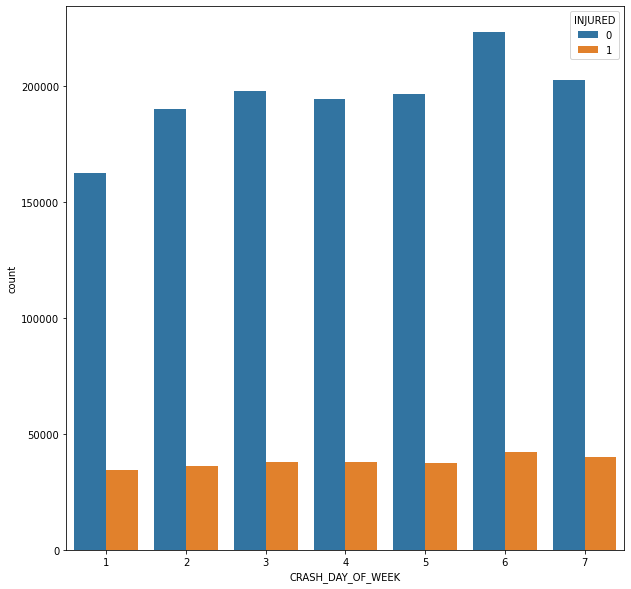

In [247]:
plt.figure(figsize=(10,10))
sns.countplot(x="CRASH_DAY_OF_WEEK", hue="INJURED", data=df)

<AxesSubplot:xlabel='TRAFFIC_CONTROL_DEVICE', ylabel='count'>

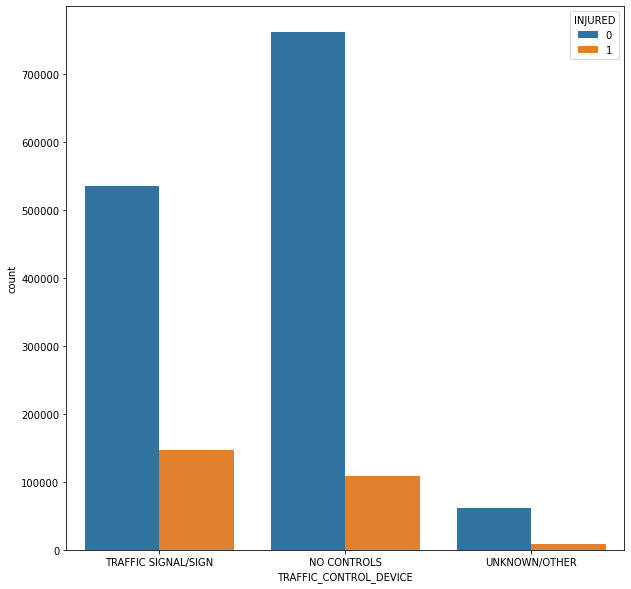

In [248]:
plt.figure(figsize=(10,10))
sns.countplot(x="TRAFFIC_CONTROL_DEVICE", hue="INJURED", data=df)

<AxesSubplot:xlabel='FIRST_CRASH_TYPE', ylabel='count'>

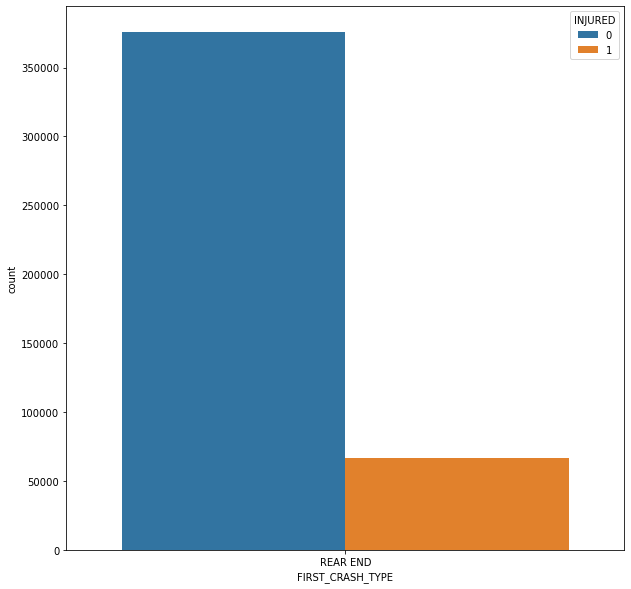

In [84]:
plt.figure(figsize=(10,10))
sns.countplot(x="FIRST_CRASH_TYPE", hue="INJURED", data=df)

<AxesSubplot:xlabel='UNIT_TYPE', ylabel='count'>

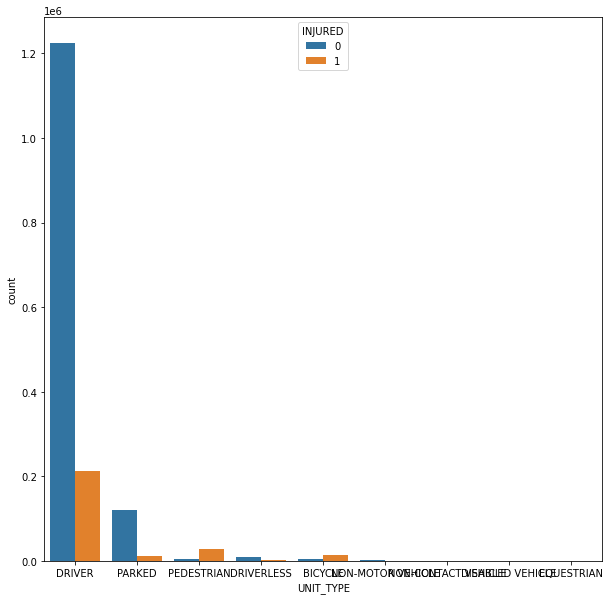

In [249]:
plt.figure(figsize=(10,10))
sns.countplot(x="UNIT_TYPE", hue="INJURED", data=df)

<AxesSubplot:xlabel='time_bins', ylabel='count'>

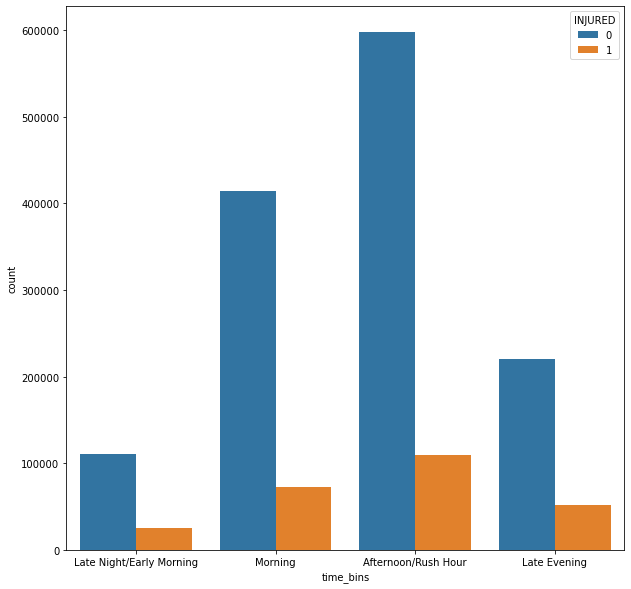

In [85]:
plt.figure(figsize=(10,10))
sns.countplot(x="time_bins", hue="INJURED", data=df)

<AxesSubplot:xlabel='age_bins', ylabel='count'>

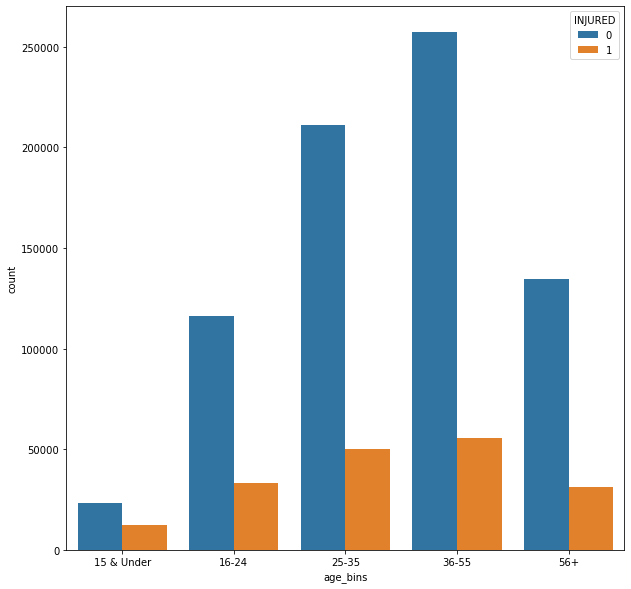

In [250]:
plt.figure(figsize=(10,10))
sns.countplot(x="age_bins", hue="INJURED", data=df)

<AxesSubplot:xlabel='SEX', ylabel='count'>

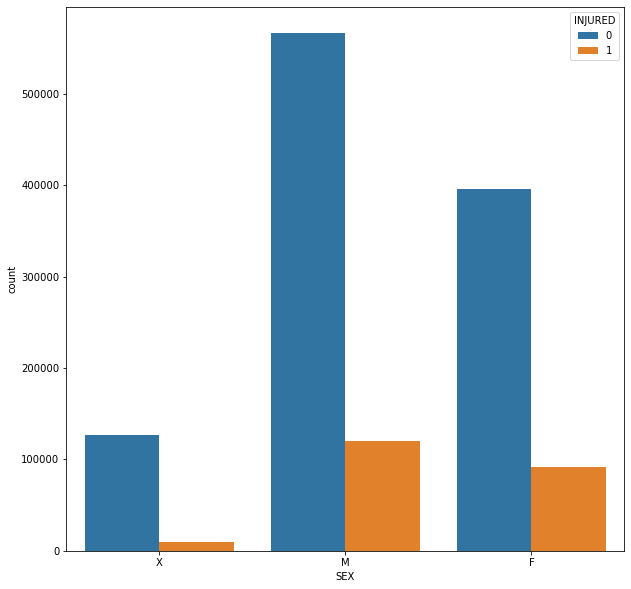

In [251]:
plt.figure(figsize=(10,10))
sns.countplot(x="SEX", hue="INJURED", data=df)

<AxesSubplot:xlabel='posted_speed', ylabel='count'>

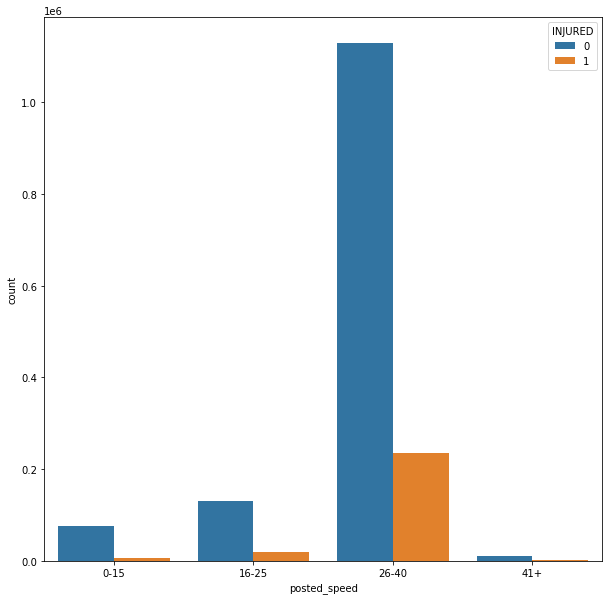

In [82]:
plt.figure(figsize=(10,10))
sns.countplot(x="posted_speed", hue="INJURED", data=df)

In [254]:
# reviewing data 
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,BEAT_OF_OCCURRENCE,INJURED,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,VEHICLE_ID_x,VEHICLE_ID_y,AGE
count,1.633868e+06,7.648520e+05,1.633852e+06,1.633868e+06,1.632208e+06,1.632208e+06,1.632208e+06,1.632208e+06,1.632208e+06,1632208.0,1.633868e+06,1.633868e+06,1.574926e+06,1.288883e+06,936650.000000
mean,2.865919e+01,1.076851e+01,1.239926e+03,1.630187e-01,1.509612e-03,2.791433e-02,1.399429e-01,8.239207e-02,2.396715e+00,0.0,1.334722e+01,4.130536e+00,5.373278e+05,4.244678e+05,38.402913
std,6.152349e+00,2.327157e+03,7.080687e+02,3.693828e-01,4.421064e-02,2.117228e-01,5.464239e-01,4.078942e-01,1.727048e+00,0.0,5.413017e+00,1.974173e+00,4.147178e+05,2.823102e+05,16.890705
min,0.000000e+00,0.000000e+00,1.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,-177.000000
25%,3.000000e+01,2.000000e+00,7.130000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0,1.000000e+01,2.000000e+00,2.388220e+05,2.133365e+05,26.000000
50%,3.000000e+01,2.000000e+00,1.213000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0,1.400000e+01,4.000000e+00,4.573595e+05,3.980180e+05,36.000000
75%,3.000000e+01,4.000000e+00,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.0,1.700000e+01,6.000000e+00,6.790948e+05,5.520880e+05,50.000000
max,9.900000e+01,1.191625e+06,6.100000e+03,1.000000e+00,4.000000e+00,1.000000e+01,2.100000e+01,1.500000e+01,6.100000e+01,0.0,2.300000e+01,7.000000e+00,1.628037e+06,1.595032e+06,110.000000


In [255]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_VISION,time_bins,age_bins,posted_speed
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DUSK,TURNING/ANGLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late Evening,NaN,26-40
1,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DUSK,TURNING/ANGLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late Evening,NaN,26-40
2,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour,NaN,41+
3,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour,NaN,41+
4,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED/FIXED,DIVIDED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon/Rush Hour,NaN,26-40


In [256]:
# Selecting columns to create a correlation matrix
selected_columns = ['CRASH_DATE_x', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
                    'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
                    'ROADWAY_SURFACE_COND', 'VEHICLE_ID_y', 'SEX', 'DRIVERS_LICENSE_STATE',
                    'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'DRIVER_VISION',
                    'time_bins', 'age_bins', 'posted_speed']

In [257]:
# Create a subset dataframe with selected columns
df_subset = df[selected_columns]
# Convert non-numeric columns to numeric 
df_subset_numeric = df_subset.apply(pd.to_numeric, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = df_subset_numeric.corr()
# Display the correlation matrix
print(correlation_matrix)

              LANE_CNT  VEHICLE_ID_y
LANE_CNT      1.000000     -0.002728
VEHICLE_ID_y -0.002728      1.000000


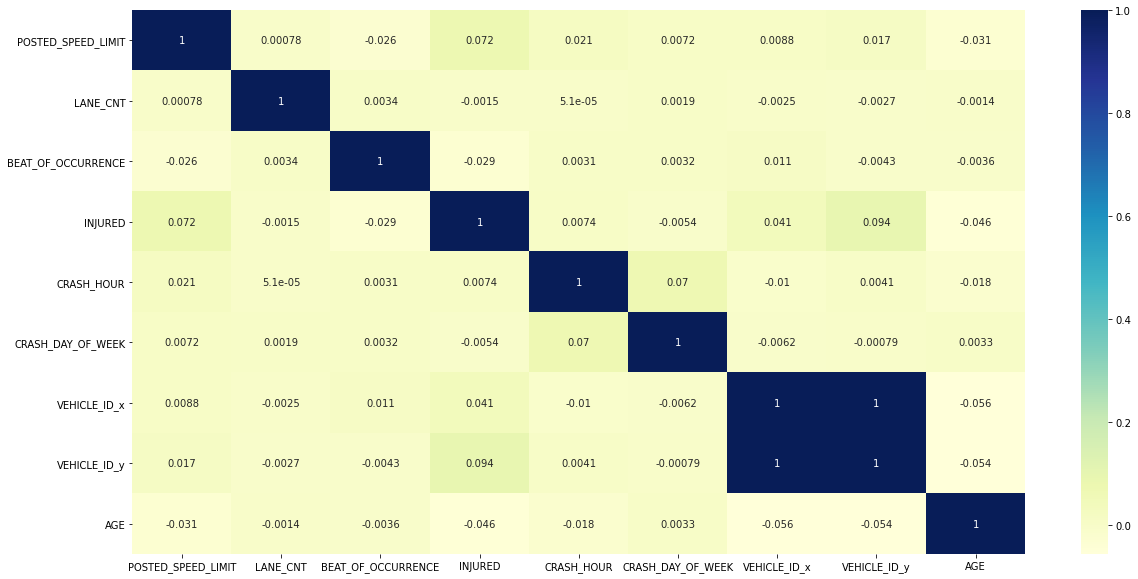

In [87]:
# Rechecking the multicolinearity to ensure that data preparation has not introduced any
plt.figure(figsize = (20, 10))
var = df.corr()
sns.heatmap(var, annot = True, cmap = "YlGnBu");

## MODELING

**Random Sampling to work with a manageable dataset**

In [258]:
#Random Sampling to create a working dataframe
df_sampled = df.sample(frac=0.005, random_state=42)
df_sampled.head()

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_VISION,time_bins,age_bins,posted_speed
1054374,a1555d4380c0d2e4f87fa6f8fea33012f82e051d73b03e...,06/30/2018 02:27:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE,NOT DIVIDED,2.0,...,MM,NaN,SAFETY EQUIPMENT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NOT OBSCURED,Afternoon/Rush Hour,36-55,26-40
983543,95d2cde8fff85053ea796e98dd60c91c0652fc2d296f72...,01/21/2018 02:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED/FIXED,DIVIDED,NaN,...,NaN,NaN,NONE PRESENT/USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,UNKNOWN,Afternoon/Rush Hour,NaN,26-40
194847,15451a0d53f2ec93bf791fc7ee939aa23ea80e01058c9a...,12/27/2017 06:15:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED/FIXED,NOT DIVIDED,2.0,...,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,Afternoon/Rush Hour,NaN,26-40
1171719,b47dc4d8ca8bccfdd91c730969f1fcf842a738e36bbdda...,05/01/2023 08:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING/ANGLE,ONE-WAY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morning,NaN,26-40
563780,513114103f189b6ef2af625433ea1fe0c662067dbe5d97...,10/29/2018 07:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,SIDESWIPE,NOT DIVIDED,2.0,...,IL,NaN,SAFETY EQUIPMENT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,Late Evening,36-55,26-40


In [259]:
df_sampled.shape

(8169, 45)

In [260]:
df_sampled.shape

(8169, 45)

**Train_Test_Split**

In [261]:
# setting X, y for train-test-split
target = 'INJURED'
X = df_sampled.drop(columns= target)
y = df_sampled[target]

# train-test-split, test_size = 25%, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

**Preprocessing Numerical**

In [262]:
# retrieving list of numeric columns 
num_cols = df_sampled.drop(columns=target).select_dtypes('number').columns.tolist()
num_cols

['POSTED_SPEED_LIMIT',
 'LANE_CNT',
 'BEAT_OF_OCCURRENCE',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'VEHICLE_ID_x',
 'VEHICLE_ID_y',
 'AGE']

In [95]:
# creating a pipeline 
# SimpleImputer will use the median to fill nulls  
# RobustScaler will use the median to scale 
num_transform = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('scale', RobustScaler())])

**Preprocessing Categorical**

In [263]:
# retrieving list of categorical columns 
cat_cols = df_sampled.drop(columns=target).select_dtypes('object').columns.tolist()
cat_cols

['CRASH_RECORD_ID',
 'CRASH_DATE_x',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'MOST_SEVERE_INJURY',
 'CRASH_DATE_y',
 'UNIT_TYPE',
 'VEHICLE_TYPE',
 'CRASH_DATE',
 'SEX',
 'DRIVERS_LICENSE_STATE',
 'DRIVERS_LICENSE_CLASS',
 'SAFETY_EQUIPMENT',
 'AIRBAG_DEPLOYED',
 'EJECTION',
 'INJURY_CLASSIFICATION',
 'DRIVER_VISION']

In [264]:
# creating a pipeline
# SimpleImputer will use strategy 'constant' == 'missing value' input for objects
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value="MISSING")),
                         ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

**Column Transformer**

In [266]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded or defined (X and y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have defined your preprocessing pipeline (preprocessing)
# For example, you might have a pipeline for numerical and categorical features

# Define the numerical features and preprocessing steps
numeric_features = X.select_dtypes(include=['number']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # You can customize the imputer strategy
])

# Define the categorical features and preprocessing steps
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)

# Fit and transform X_train
X_train_tf = preprocessor.fit_transform(X_train)

# Transform X_test using the same fitted preprocessor
X_test_tf = preprocessor.transform(X_test)

In [267]:
# combine both pipelines into one using columntransformer 
preprocessing = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', cat_transform, cat_cols)])

# preprocessing X_train and X_test
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

In [268]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf

,POSTED_SPEED_LIMIT,LANE_CNT,BEAT_OF_OCCURRENCE,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,...,INJURY_CLASSIFICATION_FATAL,INJURY_CLASSIFICATION_INCAPACITATING INJURY,INJURY_CLASSIFICATION_MISSING,INJURY_CLASSIFICATION_NO INDICATION OF INJURY,INJURY_CLASSIFICATION_NONINCAPACITATING INJURY,"INJURY_CLASSIFICATION_REPORTED, NOT EVIDENT",DRIVER_VISION_MISSING,DRIVER_VISION_NOT OBSCURED,DRIVER_VISION_OBSCURED,DRIVER_VISION_UNKNOWN
0,0.0,0.0,-0.072344,0.0,0.0,1.0,0.0,2.0,0.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.731685,0.0,0.0,0.0,0.0,0.0,0.0,-0.857143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-15.0,0.0,0.549451,0.0,0.0,0.0,0.0,0.0,0.0,-0.428571,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,-0.905678,0.0,0.0,0.0,0.0,1.0,0.0,-0.428571,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-25.0,-2.0,-0.357143,0.0,0.0,0.0,0.0,-1.0,0.0,-0.571429,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,0.0,0.0,-0.804029,0.0,0.0,0.0,0.0,-1.0,0.0,1.142857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6531,0.0,0.0,0.017399,0.0,0.0,0.0,0.0,0.0,0.0,-0.428571,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6532,0.0,0.0,-0.897436,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6533,0.0,-1.0,0.550366,0.0,0.0,0.0,0.0,2.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Class Imbalance (Synthetic Minority Over-sampling Technique)


In [269]:
# observing y_train(classes) count 
y_train.value_counts(normalize=True)

0    0.841775
1    0.158225
Name: INJURED, dtype: float64

In [271]:
#checking class balance in the training target variable
print(y_train.value_counts())
print('\n')

#checking class balance in the training target variable
print(y_test.value_counts())

0    5501
1    1034
Name: INJURED, dtype: int64


0    1376
1     258
Name: INJURED, dtype: int64


In [104]:
# # reviewing SMOTE has been implemented 
# pd.Series(y_train).value_counts()

**Logistic Regression**

In [272]:
# instantiate LogisticRegression 
log_reg = LogisticRegression()

In [273]:
# fit the model 
log_reg.fit(X_train_tf, y_train)

# predict
y_pred = log_reg.predict(X_test_tf)

In [274]:
def evaluate_classification(model, X_train_tf, X_test_tf, y_train, y_test, classes = None, 
                            normalize = 'true', cmap='summer', label = ''):
    
    """Input a model, training data and test data to return sklearn metrics
        - Classification Report for training and test 
        - Confusion Matrix for training and test 
        - ROC Curve for training and test 
        
        Args:
        model: instantiated classifier (ex: LogisticRegression = log_reg)
        X_train_tf: train_test_split & preprocessed
        X_test_tf: train_test_split & preprocessed
        y_train: train_test_split
        y_test: train_test_split 
        label: optional label for type of test 
        
        Modified Function, Citation:
        https://github.com/jirvingphd/fsds_070620_FT_cohort_notes/blob/master/Mod_3/
        mod_3_classification_project/bonus%20notebooks/classification_project_OH1_pipelines_SHAP%20.ipynb
        
    """
    # retrieve predictions for train and test data 
    y_pred_train = model.predict(X_train_tf)
    y_pred_test = model.predict(X_test_tf)
    
    # print training classification report 
    header = label + " CLASSIFICATION REPORT TRAINING "
    dashes = "---" * 20
    print(dashes, header, dashes, sep='\n')
    print(classification_report(y_train, y_pred_train, target_names = classes))
    
    # display training figures 
    fig, axes = plt.subplots(figsize=(10,4), ncols=2)
    
    # confusion matrix 
    plot_confusion_matrix(model, X_train_tf, y_train, labels=classes, normalize = normalize,
                         cmap = cmap, ax=axes[0])
    
    axes[0].set(title = 'Confusion Matrix Training')
    
    # plot ROC curve 
    plot_roc_curve(model, X_train_tf, y_train, ax=axes[1])
    roc = axes[1]
    roc.legend()
    roc.plot([0,1], [0,1], ls=':')
    roc.grid()
    roc.set_title('Receiving Operator Characteristic Training')
    plt.show()
    
    # print testing classification report 
    header_ = label + " CLASSIFICATION REPORT TESTING "
    print(dashes, header_, dashes, sep='\n')
    print(classification_report(y_test, y_pred_test, target_names = classes))
    
    # display training figures 
    fig, axes = plt.subplots(figsize=(10,4), ncols=2)
    
    # confusion matrix 
    plot_confusion_matrix(model, X_test_tf, y_test,  labels=classes, normalize = normalize, 
                          cmap = cmap, ax=axes[0])
  
    
    axes[0].set(title = 'Confusion Matrix Testing')
    
    # plot ROC curve 
    plot_roc_curve(model, X_test_tf, y_test, ax=axes[1])
    roc = axes[1]
    roc.legend()
    roc.plot([0,1], [0,1], ls=':')
    roc.grid()
    roc.set_title('Receiving Operator Characteristic Test')
    plt.show()

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5501
           1       1.00      1.00      1.00      1034

    accuracy                           1.00      6535
   macro avg       1.00      1.00      1.00      6535
weighted avg       1.00      1.00      1.00      6535



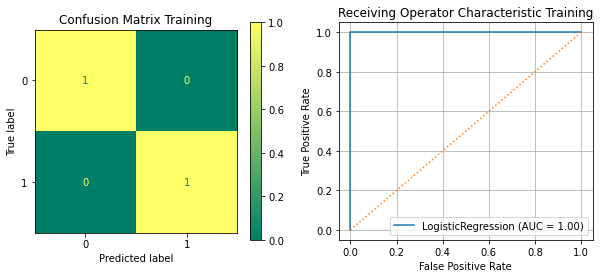

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1376
           1       1.00      1.00      1.00       258

    accuracy                           1.00      1634
   macro avg       1.00      1.00      1.00      1634
weighted avg       1.00      1.00      1.00      1634



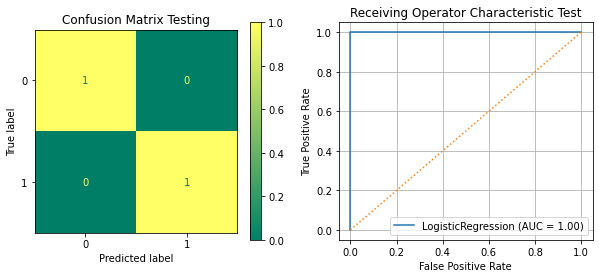

In [275]:
from sklearn.metrics import classification_report
# classification report using function 
evaluate_classification(log_reg,X_train_tf, X_test_tf, y_train, y_test, label = "Logistic Regression")

**log_reg GridsearchCV**

In [276]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
f1_scorer = make_scorer(f1_score, pos_label="1")

In [277]:
# create params_grid for LogisticRegression 
params_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty': ['l1', 'l2', 'elasticnet', None]}
# add random state to params grid

In [ ]:
# Identify unique values in y_train
unique_labels = np.unique(y_train)

# Assuming binary classification, check the unique labels
print("Unique Labels:", unique_labels)

# Set pos_label based on the actual positive class in your dataset
pos_label = unique_labels[1]  # Change this based on your dataset

# Update the f1_scorer with the correct pos_label
f1_scorer = make_scorer(f1_score, pos_label=pos_label)

# Create grid search
grid = GridSearchCV(log_reg, params_grid, cv=3, scoring=f1_scorer)

# Fit the grid search to the data
grid_result = grid.fit(X_train_tf, y_train)

# Print the best parameters
print("Best Parameters:", grid_result.best_params_)

Unique Labels: [0 1]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer

# Define the logistic regression model
log_reg = LogisticRegression()

# Define hyperparameters to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_tf, y_train)

# Get the best estimator from the grid search
best_model = grid.best_estimator_

# use the best model in your evaluation function
evaluate_classification(best_model, X_train_tf, X_test_tf, y_train, y_test, label="Logistic Regression")


## KNN Model

**knn_clf Vanilla Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate KneighborsClassifier 
knn_clf = KNeighborsClassifier()

In [ ]:
# fit the model 
knn_clf.fit(X_train_tf, y_train)

# predict
y_pred = knn_clf.predict(X_test_tf)

In [ ]:
# classification report using function 
evaluate_classification(knn_clf, X_train_tf, X_test_tf, y_train, y_test, label = 'KNN')

In [ ]:
df_sample.head()

**knn_clf GridsearchCV**

In [ ]:
# create params_grid for KNeighborsClassifier  
params_grid = {'n_neighbors': [3, 5, 7, 9, 11, 21],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# create grid search 
grid = GridSearchCV(knn_clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

In [ ]:
# classification report using function
evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, label='KNN')

## Decision Tree

In [ ]:
# instantiate DecisionTreeClassifier 
tree_clf = DecisionTreeClassifier()

**tree_clf Vanilla Model**

In [ ]:
# fit the model  
tree_clf.fit(X_train_tf, y_train)

# predict 
y_pred = tree_clf.predict(X_test_tf)

In [ ]:
# classification report using function 
evaluate_classification(tree_clf, X_train_tf, X_test_tf, y_train, y_test, label = 'Decision Tree')

**tree_clf GridsearchCV**

In [ ]:
# create params_grid for DecisionTreeClassifier  
params_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10,12,20, None],
              'min_samples_leaf':[1, 5, 10, 20, 50, 100]}

# create grid search 
grid = GridSearchCV(tree_clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

In [ ]:
# classification report using function
evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label='Decision Tree')

## Bagged Trees

In [ ]:
# instantiate Bagging + DecisionTreeClassifier  
bag_clf = BaggingClassifier(base_estimator=RandomForestClassifier())

**bag_clf Vanilla Model**

In [ ]:
# fit the model  
bag_clf.fit(X_train_tf, y_train)

# predict
y_pred = bag_clf.predict(X_test_tf)

In [ ]:
# classification report using function 
evaluate_classification(bag_clf, X_train_tf, X_test_tf, y_train, y_test, label = 'Bagged Trees')

**bag_clf GridsearchCV**

In [ ]:
# create params_grid for BaggingClassifier
params_grid = {'bootstrap': [True, False],
               'bootstrap_features': [True, False],    
               'n_estimators': [5, 10, 15],
               #'max_samples' : [0.6, 0.8, 1.0],
               'base_estimator__criterion': ['gini', 'entropy'],    
               'base_estimator__max_depth': [1, 5, 10, 15, None]}

# create grid search 
grid = GridSearchCV(bag_clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

In [ ]:
# classification report using function
evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label='Bagged Trees')

## Random Forest

In [ ]:
# instantiate RandomForestClassifier  
forest_clf = RandomForestClassifier()

In [ ]:
# fit the model 
forest_clf.fit(X_train_tf, y_train)

# get prediction 
y_pred = forest_clf.predict(X_test_tf)

In [ ]:
# classification report using function 
evaluate_classification(forest_clf,X_train_tf, X_test_tf, y_train, y_test, label = 'Random Forest')

**forest_clf GridsearchCV**

In [ ]:
# create params_grid for RandomForestClassifier 
params_grid = {'criterion': ['gini', 'entropy'],   
              'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# create grid search 
grid = GridSearchCV(forest_clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

In [ ]:
# classification report using function
evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label='Random Forest')

In [ ]:
best_clf = grid.best_estimator_

## Analysis and Interpretation

* Bagging Random Forest Classifier returned an accuracy rate of 89%
* Other models returned nearly the same accuracy rate or higher but decided with this one because the accuracy rate on the     training level was not 100%. 
* This will avoid overfitting to a degree.

In [ ]:
# Accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf

In [ ]:
importance = pd.Series(best_clf.feature_importances_ ,index=X_train_tf.columns)
importance.sort_values().tail(20).plot(kind='barh', figsize=(10,10), title = 'Feature Importance')

**Observations:**

**Ped/Cyclist, driver, and pedestrians have the highest coefs with injuries/accidents**

In [ ]:
X_shap = shap.sample(X_train_tf,20)
explainer = shap.TreeExplainer(best_clf)
shap_values = explainer.shap_values(X_shap)
shap.summary_plot(shap_values, X_shap, plot_type="bar")

**Observations:**
    

* Most features have a 50/50 split with who is injured or not injured
* Missing information on type of vehicle involved
* Missing information on if airbag deployed or not

## Conclusion

* Based on my classification model, the type of accidents that appears to occur most frequently is drivers colliding with pedestrians or cyclists on the street.
* Analyzing the data indicates that pedestrians typically do not wear contrasting or reflective clothing, and the majority of accidents take place in the afternoon or during rush hour. 
* Furthermore, my findings reveal that a significant number of accidents occur in speed limit zones labeled between 30-40 mph.
## Recommendations:
    * Pedestrians and cyclists should heighten their awareness and wear contrasting colors, particularly during rush hour. 
    * To enhance safety, the city can implement measures such as increasing the number of traffic signs and creating lanes that        are more accommodating for pedestrians and cyclists.
    * Additionally, considering the higher frequency of accidents during the afternoon and rush hour, the city might consider         lowering speed limits during these times or implementing increased patrols in zones with speed limits ranging from 30 to         40 mph.

In [ ]:
df.head()